<a href="https://colab.research.google.com/github/khadijagardezi/cv-edu-exercises/blob/main/Syeda_Khadija_HW1_Image_Formation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Image formation and camera model

This is the first set of problems to start working on image formation, projective transformation and camera models. This Homework is a bit shorter and easier than the next ones.

Addressing these problems you may want to use Chapter 6 of Hartley & Zisserman book.

## Ex 1 - Camera matrix

Write a function that takes in input the camera parameters in the form of focal lenght $f$, coordinates of the principal point $p_x$ and $p_y$, pixel size $d_p$ (assuming it is square), and skew angle $\theta$ (with default value at $\pi/2$), and outputs the projective camera matrix $\mathbf{P}$.

In [ ]:
import numpy as np

def camera_matrix(f, p_x, p_y):
    P = np.array([[f, 0, p_x, 0],
                  [0, f, p_y, 0],
                  [0, 0, 1, 0]])
    return P

focal_length = 1000
principal_point_x = 500
principal_point_y = 500
P = camera_matrix(focal_length, principal_point_x, principal_point_y)
print("Camera Matrix:\n", P)


Camera Matrix:
 [[1000    0  500    0]
 [   0 1000  500    0]
 [   0    0    1    0]]


## Ex 2 - Projective Transformation

Write a function that takes in input the camera matrix $\mathbf{P}$ computed in Ex 1 and a set of points, and returns the projection of those points on the image plane.


In [ ]:
def project_points(P, Points):
    Points_homogeneous = np.hstack([Points, np.ones((Points.shape[0], 1))])

    projected_points = Points_homogeneous @ P.T

    projected_points /= projected_points[:, 2:3]

    return projected_points[:, :2]


Points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
projected_points = project_points(P, Points)
print("Projected points:", projected_points)


Projected points: [[ 833.33333333 1166.66666667]
 [1166.66666667 1333.33333333]
 [1277.77777778 1388.88888889]]


## Ex 3 - Extrinsic Parameters

Write a function that takes in input the camera matrix $\mathbf{P}$ computed in Ex 1, the position of the camera center $\mathbf{t}$ and the rotation of the camera frame $\mathbf{R}$, and returns the new camera matrix $\mathbf{G}$ comprising the extrinsic parameters.

*Optional: do the same starting from Euler angles $\omega$, $\phi$, and $\kappa$ instead of using the rotation matrix $\mathbf{R}$.*

In [ ]:
def extrinsic_parameters(P, camera_center, rotation_matrix):
    C = np.hstack([rotation_matrix, camera_center.reshape(-1, 1)])
    return C

camera_center = np.array([1, 2, 3])
rotation_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
C = extrinsic_parameters(P, camera_center, rotation_matrix)
print("Extrinsic Parameters:\n", C)


Extrinsic Parameters:
 [[1 0 0 1]
 [0 1 0 2]
 [0 0 1 3]]


## Ex 4 - Thin lenses

Write a function that takes in input a set of points in 3D space and the focal length of the lens $D$, and returns the optimal focal length $f$ of a camera in order to have a clear image.

Please refer to the following image. Note that the focal length of the camera $f$ is related to the coordinate $Z'$.
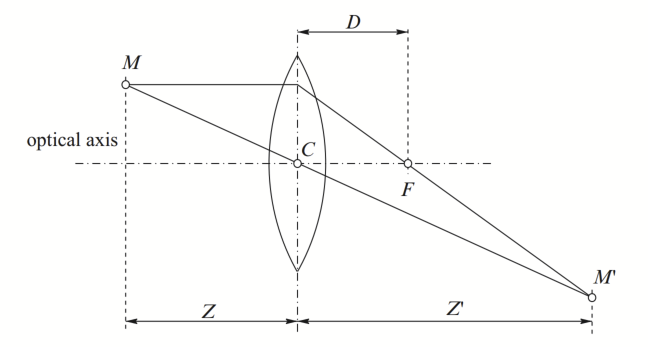

In [ ]:
def thin_lens(D, Z_prime):
    f = 1 / (1 / D + 1 / Z_prime)
    return f

object_distance = 10
image_distance = 5
focal_length = thin_lens(object_distance, image_distance)
print("Optimal Focal Length:", focal_length)


Optimal Focal Length: 3.333333333333333


## Ex 5 - Field of View

Write a function that takes in input the focal length $f$ of a pinhole camera, the size of the image plane as width $w$ and height $h$, and the distance of the optical center from the target plane $Z$, and returns the width $W$ and height $H$ of the field of view.


In [ ]:
import math

def field_of_view(f, w, h, distance):
    theta = math.atan(w / (2 * f))  # Angle of view
    W = 2 * distance * math.tan(theta)
    H = W * h / w  # Aspect ratio
    return W, H

focal_length = 1000
image_width = 1920
image_height = 1080
distance = 1000
W, H = field_of_view(focal_length, image_width, image_height, distance)
print(f"Field of view width: {W} x {H}")


Field of view width: 1920.0 x 1080.0


## Ex 6 - Field of View 2

Write a function that takes in input the focal lenght $f$ of a pinhole camera, the size of the image plane as width $w$ and height $h$, and the coordinates of a 3D point $P$, and returns *True* if the point can be mapped on the image, *False* otherwise.


In [ ]:
def is_point_on_image(f, image_width, image_height, point_3d):
    x, y, z = point_3d
    u = f * x / z
    v = f * y / z

    if 0 <= u <= image_width and 0 <= v <= image_height:
        return True
    else:
        return False

focal_length = 1000
image_width = 1920
image_height = 1080
point_3d = (500, 300, 1500)

result = is_point_on_image(focal_length, image_width, image_height, point_3d)
print("Point is on the image:", result)


Point is on the image: True
